# Assignment #3 - Basic Filters

## Arik Horodniceanu - PID A53285765

In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.assignment3 as im
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Separable Convolutions

### 1

In [13]:
# Same function as in assignment3.py
def kernel(name, tau=1, eps=1e-3):
    
    # l is derived from the formulas of f()
    if (name.startswith('gaussian')):
        s1, s2 = 0, 0
        s = np.floor(np.sqrt(2*(tau**2)*((-1)*np.log(eps))))
        
        if (name.endswith('1')):
            s1 = s
        elif (name.endswith('2')):
            s2 = s
        else:
            s1, s2 = s, s
        
        ax = np.arange(-s1,s1+1)
        ay = np.arange(-s2,s2+1)
        xx, yy = np.meshgrid(ax, ay, indexing='ij')
        nu = np.exp(-(xx**2 + yy**2) / (2*tau**2))
        nu /= np.sum(nu)
        
    elif (name.startswith('exponential')):
        s1, s2 = 0, 0
        s = np.floor(-1*tau*np.log(eps))
        
        if (name.endswith('1')):
            s1 = s
        elif (name.endswith('2')):
            s2 = s
        else:
            s1, s2 = s, s
            
        ax = np.arange(-s1,s1 +1)
        ay = np.arange(-s2,s2 +1)
        xx, yy = np.meshgrid(ax, ay, indexing='ij')
        nu = np.exp(-np.sqrt(xx**2 + yy**2) / tau**2)
        nu /= np.sum(nu)
        
    elif (name.startswith('box')):
        s = 2*tau + 1
        if (name.endswith('1')):
            nu = np.ones((s, 1))
            
        elif (name.endswith('2')):
            nu = np.ones((1,s))
            
        else:
            nu = np.ones((s,s))
            
        nu/= np.sum(nu) 
    
    # Definition from lecture slides
    elif name is 'grad1_forward':
        nu = np.zeros((3, 1))
        nu[1,0] = -1
        nu[2,0] = 1
    elif name is 'grad1_backward':
        nu = np.zeros((3, 1))
        nu[0,0] = -1
        nu[1,0] = 1
    elif name is 'grad2_forward':
        nu = np.zeros((1, 3))
        nu[0, 1] = -1
        nu[0, 2] = 1
    elif name is 'grad2_backward':
        nu = np.zeros((1, 3))
        nu[0, 1] = 1
        nu[0, 0] = -1
    elif name is 'laplacian1':
        nu = np.zeros((3, 1))
        nu[0, 0] = nu[2, 0] = 1
        nu[1, 0] = -2
    elif name is 'laplacian2':
        nu = np.zeros((1, 3))
        nu[0, 0] = nu[0, 2] = 1
        nu[0, 1] = -2
    else:
        print('Error: Kernel not defined. Returning box kernel.')
        nu = kernel('box',tau,eps)
    return nu

### 2

In [14]:
# Same function as in assignment3.py
def convolve(x, nu, boundary='periodical', separable=None):
    # x - image
    # nu - convolution kernel
    # boundary - boundary condition according to which to shift x
    # returns the result of the convolution between x and nu
    if (separable==None):
        s1 = int((nu.shape[0] - 1) / 2)
        s2 = int((nu.shape[1] - 1) / 2)

        xconv = np.zeros(x.shape)
        for k in range(-s1, s1+1):
            for l in range(-s2, s2+1):
                xconv += nu[s1+k][s2+l]*im.shift(x,-k,-l,boundary)
    
    elif (separable=='product'):
        xconv=convolve(x,nu[0],boundary)
        xconv=convolve(xconv,nu[1],boundary)
        
    elif (separable=='sum'):
        xconv = convolve(x,nu[0],boundary) + convolve(x,nu[1],boundary)

    else:
        print('Invalid separable conditions. Returning original image.')
        return x
    
    return xconv

### 3

<IPython.core.display.Javascript object>


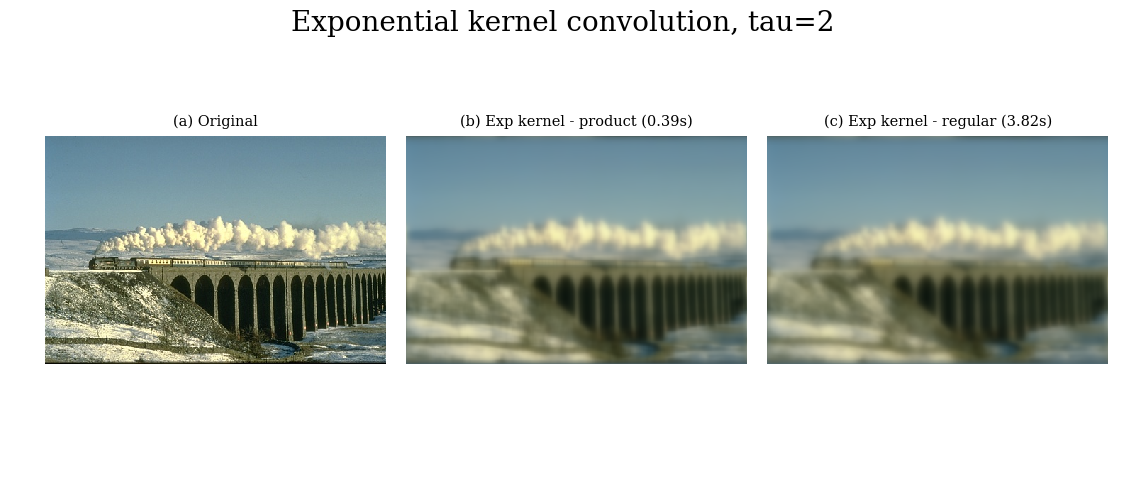

False


In [31]:

x=plt.imread('assets/train.png')
t1=time.time()
xsepbox=convolve(x,[kernel('exponential1',tau=2),kernel('exponential2',tau=2)],separable='product')
t2=time.time()
tsepbox="{0:.2f}".format(t2-t1)

t1=time.time()
xbox=convolve(x,kernel('exponential',tau=2))
t2=time.time()
tbox="{0:.2f}".format(t2-t1)

fig, axes = plt.subplots(ncols=3,figsize=(9, 4), sharex='all', sharey='all')
fig.suptitle('Exponential kernel convolution, tau=2', fontsize=16)
axes[0].set_title('(a) Original')
im.show(x, ax=axes[0])

axes[1].set_title('(b) Exp kernel - product ('+ tsepbox +'s)')
im.show(xsepbox, ax=axes[1])

axes[2].set_title('(c) Exp kernel - regular ('+ tbox +'s)')
im.show(xbox)

print(np.allclose(xsepbox,xbox))

The exponential kernel is not separable, so clearly the results are not the same.

<IPython.core.display.Javascript object>


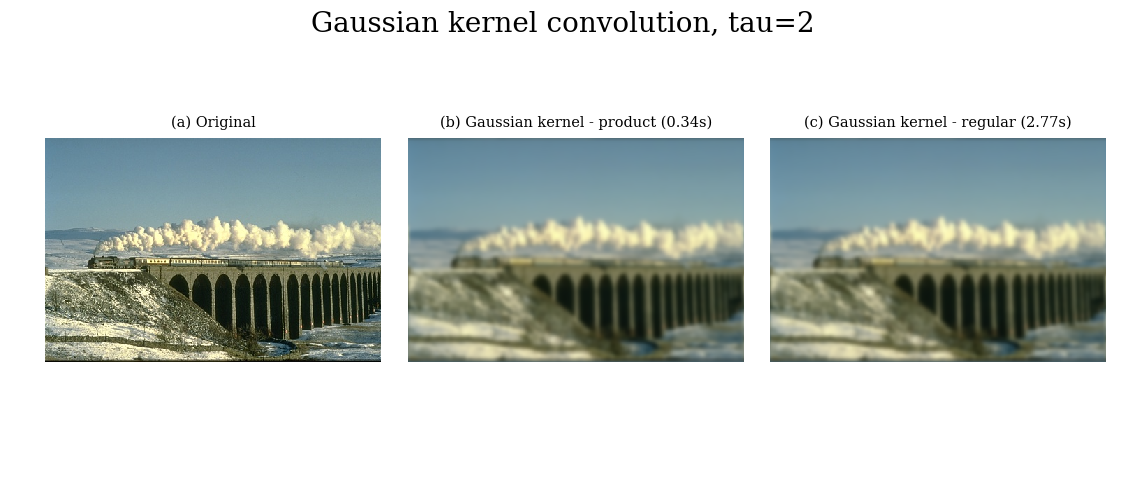

True


In [78]:
tau=3
x=plt.imread('assets/train.png')
t1=time.time()
xsepbox=convolve(x,[kernel('gaussian1',tau),kernel('gaussian2',tau)],separable='product')
t2=time.time()
tsepbox="{0:.2f}".format(t2-t1)

t1=time.time()
xbox=convolve(x,kernel('gaussian',tau))
t2=time.time()
tbox="{0:.2f}".format(t2-t1)

fig, axes = plt.subplots(ncols=3,figsize=(9, 4), sharex='all', sharey='all')
fig.suptitle('Gaussian kernel convolution, tau=2', fontsize=16)
axes[0].set_title('(a) Original')
im.show(x, ax=axes[0])

axes[1].set_title('(b) Gaussian kernel - product ('+ tsepbox +'s)')
im.show(xsepbox, ax=axes[1])

axes[2].set_title('(c) Gaussian kernel - regular ('+ tbox +'s)')
im.show(xbox)

print(np.allclose(xsepbox,xbox))

The gaussian kernel is separable, so the results for the separable and non-separable convolutions are identical but much faster (order of magnitude) for product.

<IPython.core.display.Javascript object>


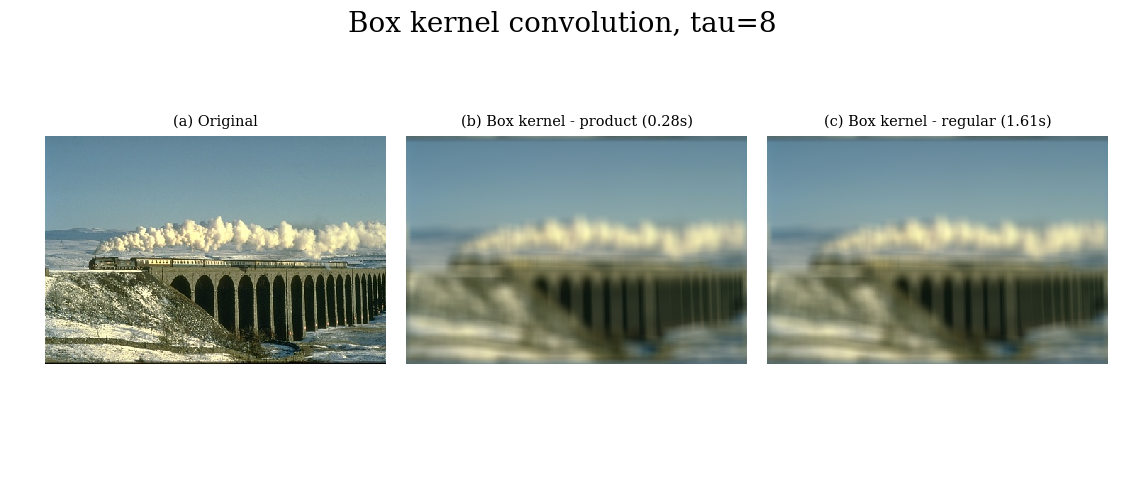

True


In [61]:
tau = 8
x=plt.imread('assets/train.png')
t1=time.time()
xsepbox=convolve(x,[kernel('box1',tau),kernel('box2',tau)],separable='product')
t2=time.time()
tsepbox="{0:.2f}".format(t2-t1)

t1=time.time()
xbox=convolve(x,kernel('box',tau))
t2=time.time()
tbox="{0:.2f}".format(t2-t1)

fig, axes = plt.subplots(ncols=3,figsize=(9, 4), sharex='all', sharey='all')
fig.suptitle('Box kernel convolution, tau=8', fontsize=16)
axes[0].set_title('(a) Original')
im.show(x, ax=axes[0])

axes[1].set_title('(b) Box kernel - product ('+ tsepbox +'s)')
im.show(xsepbox, ax=axes[1])

axes[2].set_title('(c) Box kernel - regular ('+ tbox +'s)')
im.show(xbox)

fig.show()
print(np.allclose(xsepbox,xbox))

The box kernel is also separable, so the results for the separable and non-separable convolutions are identical but faster (order of magnitude) for product.

## 2 Derivative Filters

### 4

See the implementation of the kernel function above.

### 5

<IPython.core.display.Javascript object>


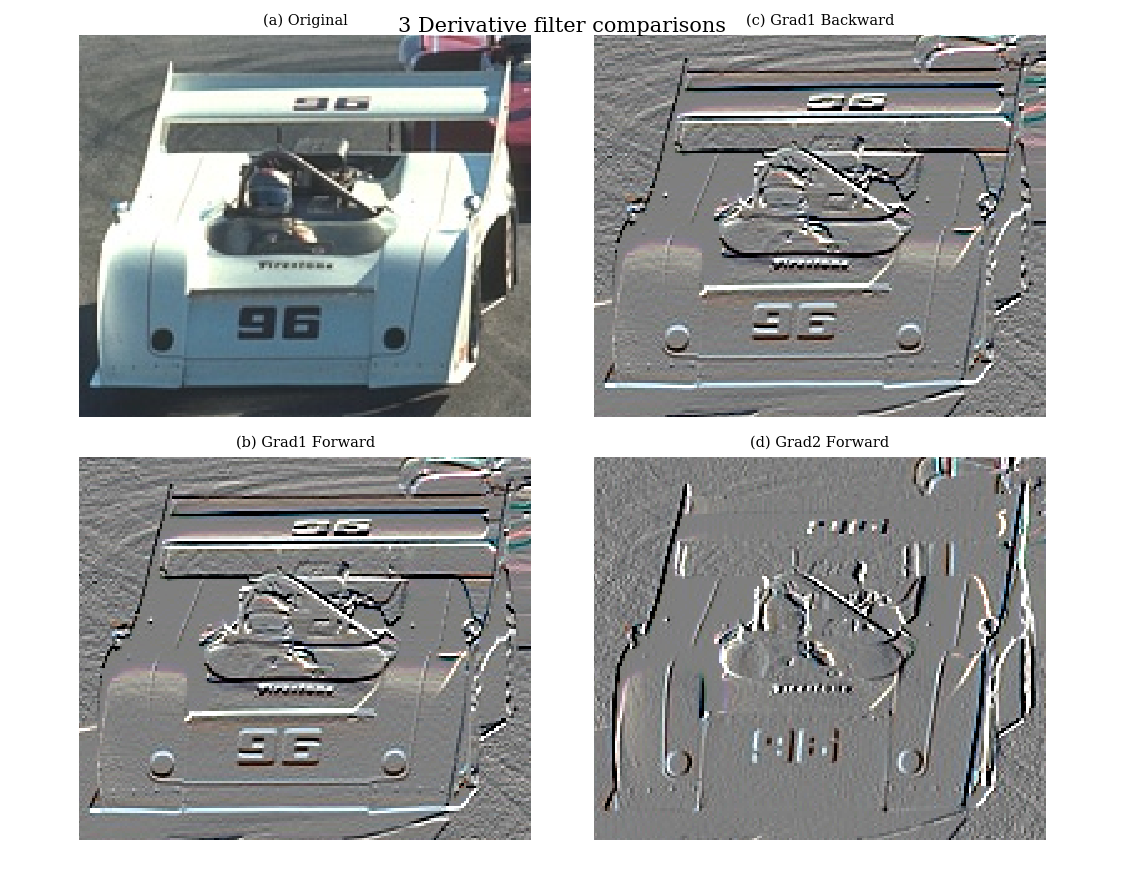

In [15]:
y=plt.imread('assets/race.png')

y1f=convolve(y,kernel('grad1_forward'))

y1b=convolve(y,kernel('grad1_backward'))

y2f=convolve(y,kernel('grad2_forward'))

fig, axes = plt.subplots(ncols=2, nrows = 2, figsize=(9, 7), sharex='all', sharey='all')
fig.suptitle('3 Derivative filter comparisons', fontsize=12)
axes[0,0].set_title('(a) Original')
im.show(y, ax=axes[0,0])

axes[1,0].set_title('(b) Grad1 Forward')
im.show(y1f, ax=axes[1,0],vmin=-0.2,vmax=0.2)

axes[0,1].set_title('(c) Grad1 Backward')
im.show(y1b, ax=axes[0,1],vmin=-0.2,vmax=0.2)

axes[1,1].set_title('(d) Grad2 Forward')
im.show(y2f, ax=axes[1,1],vmin=-0.2,vmax=0.2)

fig.show()

<IPython.core.display.Javascript object>


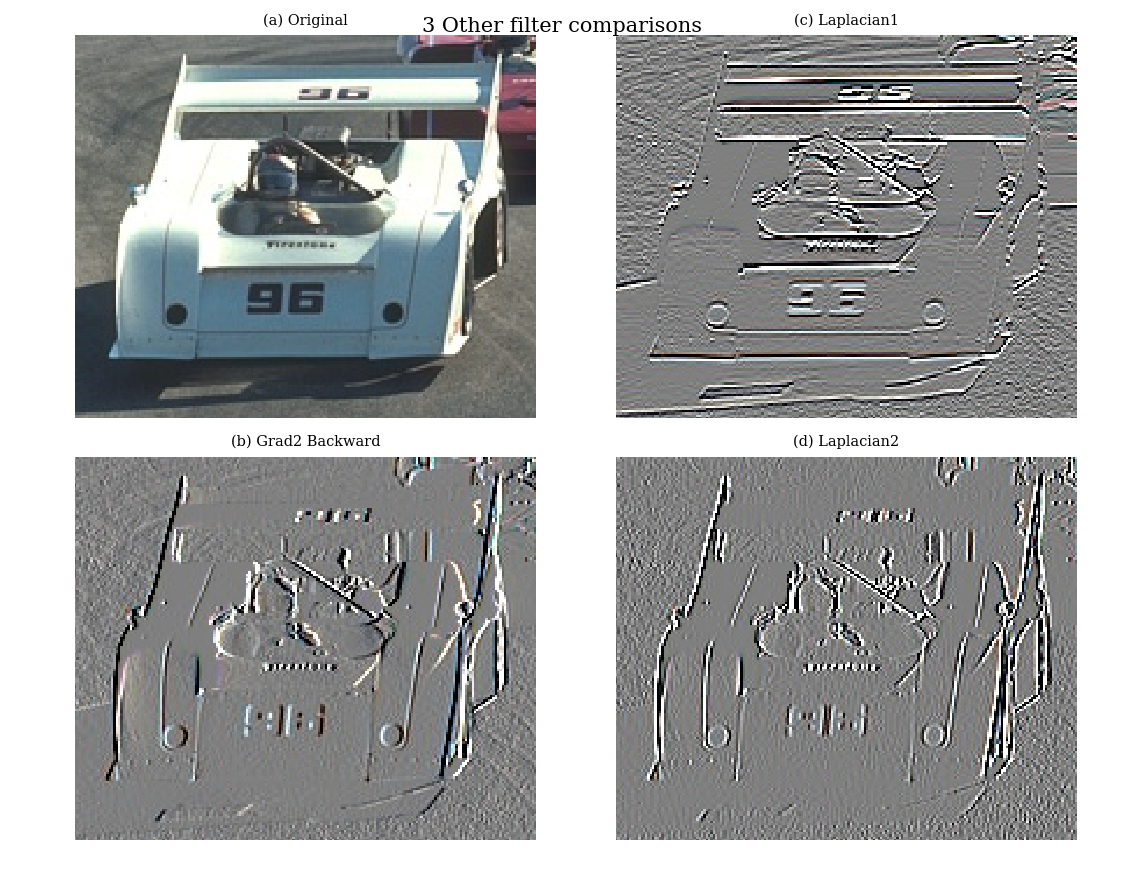

In [16]:
y=plt.imread('assets/race.png')

y2b=convolve(y,kernel('grad2_backward'))

y1l=convolve(y,kernel('laplacian1'))

y2l=convolve(y,kernel('laplacian2'))

fig, axes = plt.subplots(ncols=2, nrows = 2, figsize=(9, 7), sharex='all', sharey='all')
fig.suptitle('3 Other filter comparisons', fontsize=12)
axes[0,0].set_title('(a) Original')
im.show(y, ax=axes[0,0])

axes[1,0].set_title('(b) Grad2 Backward')
im.show(y2b, ax=axes[1,0],vmin=-0.2,vmax=0.2)

axes[0,1].set_title('(c) Laplacian1')
im.show(y1l, ax=axes[0,1],vmin=-0.2,vmax=0.2)

axes[1,1].set_title('(d) Laplacian2')
im.show(y2l, ax=axes[1,1],vmin=-0.2,vmax=0.2)

fig.show()

Results look as expected.

### 6

From slide 27 in the chapter 2 slides, it is known that for 1d signals the forward gradient's coefficients can be expressed as: $\kappa_{forward}=(0,-1,1)$ ie the gradient at each point is the difference between the "next" pixel and the current one. 

The backward gradient's coefficients are given as: $\kappa_{backward}=(-1,1,0)$ ie the gradient at each point is the difference between the current pixel and the "previous" one.

Following the derivation for 4d signals in the assignment description, we can see that the backwards gradient is a rotated (to the left by 1 spot) version of the forward gradient. Since this is periodical padding, the same value is replicated periodically, so applying these rules to the matrix's rows, we get:

$$\nabla_1^{backward}=\begin{bmatrix}
    1 & 0 & 0  & -1 \\
    -1  & 1 & 0  & 0 \\
    0 & -1 & 1 &0\\
    0  & 0 & -1  & 1
\end{bmatrix}$$

And it is easy to see that: $$(\nabla_1^{forward})^T =-\nabla_1^{backward}. \square$$

### 7

In [54]:
x=plt.imread('assets/train.png')
y=plt.imread('assets/race.png')
boundary = 'periodical'
back1 = kernel('grad1_backward')
forward1 = kernel('grad1_forward')
R_LHS = convolve(y,back1,boundary)
LHS = np.sum(x*R_LHS)
L_RHS = convolve(x,forward1,boundary)
RHS = -1*np.sum(L_RHS*y)

print(np.isclose(LHS,RHS))

True


In [55]:
x=plt.imread('assets/train.png')
y=plt.imread('assets/race.png')
boundary = 'zero-padding'
back1 = kernel('grad1_backward')
forward1 = kernel('grad1_forward')
R_LHS = convolve(y,back1,boundary)
LHS = np.sum(x*R_LHS)
L_RHS = convolve(x,forward1,boundary)
RHS = -1*np.sum(L_RHS*y)

print(np.isclose(LHS,RHS))

True


In [56]:
x=plt.imread('assets/train.png')
y=plt.imread('assets/race.png')
boundary = 'extension'
back1 = kernel('grad1_backward')
forward1 = kernel('grad1_forward')
R_LHS = convolve(y,back1,boundary)
LHS = np.sum(x*R_LHS)
L_RHS = convolve(x,forward1,boundary)
RHS = -1*np.sum(L_RHS*y)

print(np.isclose(LHS,RHS))

False


This is only true for periodical padding and zero-padding, false for extension padding. This makes sense, as the forward and backward gradients are essentially shifted version of each other with the above 2 padding schemes, so it reasonable that they are also adjoint ("transposed") versions.

### 8

In extension padding, the extra padding is replaced by the same value as the edge, so the difference will be zero. Applying this to the matrix's rows, the forward gradient's matrix can be represented as:

$$\nabla_1^{forward}=\begin{bmatrix}
    -1 & 1 & 0  & 0 \\
    0  & -1& 1 & 0 \\
    0 & 0 & -1& 1 \\
    0  & 0 & 0 & 0
\end{bmatrix}$$

The backward gradient's matrix can be represented as:

$$\nabla_1^{backward}=\begin{bmatrix}
    0 & 0 & 0 & 0 \\
    -1  & 1 & 0 & 0 \\
    0 & -1 & 1 & 0 \\
    0 & 0 & -1 & 1
\end{bmatrix}$$

And clearly (looking at the first row in the forward matrix for example):
$$(\nabla_1^{forward})^T \neq-\nabla_1^{backward}.$$

Similarly, for zero-padding the forward gradient's matrix is given by:

$$\nabla_1^{forward}=\begin{bmatrix}
    -1 & 1 & 0 & 0 \\
    0 & -1& 1 & 0 \\
    0 & 0 & -1 & 1 \\
    0 & 0 & 0 & -1
\end{bmatrix}$$

The backward gradient's matrix can be represented as:

$$\nabla_1^{backward}=\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    -1 & 1 & 0 & 0 \\
    0 & -1 & 1 &0\\
    0 & 0 & -1 & 1
\end{bmatrix}$$

And so for zero-padding $$(\nabla_1^{forward})^T =-\nabla_1^{backward}.$$

### 9

In [125]:
y=plt.imread('assets/race.png')
boundary = 'periodical'
back1 = kernel('grad1_backward')
forward1 = kernel('grad1_forward')
lap1 = kernel('laplacian1')
y1 = convolve(y,forward1,boundary)
LHS = convolve(y1,back1,boundary)
RHS = convolve(y,lap1,boundary)
print(np.allclose(LHS,RHS))

True


In [72]:
y=plt.imread('assets/race.png')
boundary = 'extension'
back1 = kernel('grad1_backward')
forward1 = kernel('grad1_forward')
lap1 = kernel('laplacian1')
y1 = convolve(y,forward1,boundary)
LHS = convolve(y1,back1,boundary)
RHS = convolve(y,lap1,boundary)
print(np.allclose(LHS,RHS))

False


In [73]:
y=plt.imread('assets/race.png')
boundary = 'zero-padding'
back1 = kernel('grad1_backward')
forward1 = kernel('grad1_forward')
lap1 = kernel('laplacian1')
y1 = convolve(y,forward1,boundary)
LHS = convolve(y1,back1,boundary)
RHS = convolve(y,lap1,boundary)
print(np.allclose(LHS,RHS))

False


Only true for periodical padding, showing that the other boundary conditions do not yield a separable fitler. Only with this padding are the transformations actually shifted versions of each other and so the equivalent transformation (laplacian ie derivative of derivative) is separable.

### 10

Denote some 4d vector as $y=(y_1,y_2,y_3,y_4)$.

Multiplying the matrix forms derived in section 6, we get:
$$\nabla_1^{forward}\nabla_1^{backward}y=\begin{bmatrix}
    1 & 0 & 0  & -1 \\
    -1  & 1 & 0  & 0 \\
    0 & -1 & 1 &0\\
    0  & 0 & -1  & 1
\end{bmatrix}\begin{bmatrix}
    -1 &1 & 0  & 0 \\
    0 & -1 & 1  & 0 \\
    0 & 0 & -1 &1\\
    1  & 0 & 0 & -1
\end{bmatrix}y=$$$$
\begin{bmatrix}
     y_4 - 2y_1 +y_2 \\
    y_1 - 2y_2 + y_3 \\
    y_2 - 2y_3 + y_4 \\
    y_3 - 2y_4 + y_1
\end{bmatrix} = \Delta_1y. \square$$

By definition of the laplacian from slide 30 in chapter 2.

### 11

In [29]:
def laplacian(x, boundary='periodical'):
    
    return convolve(x,[kernel('laplacian1'), kernel('laplacian2')],boundary,separable='sum')

### 12

In [66]:
def grad(x, boundary='periodical'):
    forward1 = convolve(x,kernel('grad1_forward'),boundary)
    forward2 = convolve(x,kernel('grad2_forward'),boundary)
    g = np.stack((forward1,forward2),axis=2)
    return g


### 13

In [71]:
def div(f, boundary='periodical'):
    g1 = convolve(f[:,:,0],kernel('grad1_backward',boundary))
    g2 = convolve(f[:,:,1],kernel('grad2_backward',boundary))
    d = g1 + g2
    return d

### 14

In [70]:
x = plt.imread('assets/train.png')
print(np.allclose(div(grad(x)),laplacian(x)))

True


In [69]:
x = plt.imread('assets/train.png')
y = plt.imread('assets/race.png')
gx = grad(x)
gy = grad(y)
LHS = np.sum(gx*gy)
RHS = (-1)*np.sum((laplacian(x)*y))
print(np.allclose(LHS,RHS))

True


From the results of the previous sections, the definition of the laplacian and the fact that it is separable into a sum, it is expected that $div\nabla x =\Delta x$. From section 9, the second equality holds true for the gradients and the laplacian.